# Violent Crime Rates by US State
### Teresa M. Vail
### COMP 4449 - Data Science Capstone
### Midterm Project

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas. The goal of this project is to identify hierarchies of clusters of US states according to violent crime rates data here.

In [1]:
import pandas as pd
violent_crime = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectUSA/data/violent_crime.csv")
violent_crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Data Preparation

Let's change the name of "Unnamed: 0" column to "State" column to clarify that it is an U.S. state. 

In [2]:
violent_crime = violent_crime.rename(columns={'Unnamed: 0': 'State'})
violent_crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


Let's check to see if we have any missing values.

In [3]:
violent_crime.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Hooray! We don't have any missing values, so we don't need to worry about imputing or deleting records with missing values. 

Let's add four new columns:
- "Region" and "RegionCode" - to signify which geographic region the states belong to (e.g. Northeast, Midwest, South, and West)
- "Division" and "DivisionCode" - to signify which division the states belong to (e.g. Mountain, South Atlantic, East North Central, etc.)


I am using the Census Regions and Divisions of the United States from the US Census Bureau; this is the most commonly used classification system according to Wikipedia. Since Washington D.C. is not included in the DataFrame, I will be leaving it out from the South Region and South Atlantic Divsion. 

There are four regions and nine divisions. Note that the region and division numbers are relative to each other (e.g. Northeast region is 1, and will increase as you head westward to the West, which is 4). This relativity allow me to scale these columns since they would be considered more of numeric rather than ordinal. 

In [4]:
regions = { "Connecticut" : "Northeast",
           "Maine": "Northeast", 
           "Massachusetts": "Northeast",
           "New Hampshire": "Northeast", 
           "Rhode Island": "Northeast", 
           "Vermont": "Northeast", 
           "New Jersey": "Northeast", 
           "New York": "Northeast", 
           "Pennsylvania": "Northeast",
           "Illinois": "Midwest", 
           "Indiana": "Midwest", 
           "Michigan": "Midwest", 
           "Ohio": "Midwest", 
           "Wisconsin": "Midwest", 
           "Iowa": "Midwest", 
           "Kansas": "Midwest", 
           "Minnesota": "Midwest", 
           "Missouri": "Midwest", 
           "Nebraska": "Midwest", 
           "North Dakota": "Midwest", 
           "South Dakota": "Midwest",
           "Delaware": "South", 
           "Florida": "South", 
           "Georgia": "South", 
           "Maryland": "South", 
           "North Carolina": "South", 
           "South Carolina": "South", 
           "Virginia": "South", 
           "West Virginia": "South", 
           "Alabama": "South", 
           "Kentucky": "South", 
           "Mississippi": "South", 
           "Tennessee": "South", 
           "Arkansas": "South", 
           "Louisiana": "South", 
           "Oklahoma": "South",
           "Texas" : "South",
           "Arizona": "West", 
           "Colorado": "West", 
           "Idaho": "West", 
           "Montana": "West", 
           "Nevada": "West", 
           "New Mexico": "West", 
           "Utah": "West", 
           "Wyoming": "West", 
           "Alaska": "West",
           "California": "West", 
           "Hawaii": "West", 
           "Oregon": "West", 
           "Washington" : "West"
          }

regionCode = { "Connecticut" : 1,
           "Maine": 1, 
           "Massachusetts": 1,
           "New Hampshire": 1, 
           "Rhode Island": 1, 
           "Vermont": 1, 
           "New Jersey": 1, 
           "New York": 1, 
           "Pennsylvania": 1,
           "Illinois": 2, 
           "Indiana": 2, 
           "Michigan": 2, 
           "Ohio": 2, 
           "Wisconsin": 2, 
           "Iowa": 2, 
           "Kansas": 2, 
           "Minnesota": 2, 
           "Missouri": 2, 
           "Nebraska": 2, 
           "North Dakota": 2, 
           "South Dakota": 2,
           "Delaware": 3, 
           "Florida": 3, 
           "Georgia": 3, 
           "Maryland": 3, 
           "North Carolina": 3, 
           "South Carolina": 3, 
           "Virginia": 3, 
           "West Virginia": 3, 
           "Alabama": 3, 
           "Kentucky": 3, 
           "Mississippi": 3, 
           "Tennessee": 3, 
           "Arkansas": 3, 
           "Louisiana": 3, 
           "Oklahoma": 3,
           "Texas" : 3,
           "Arizona": 4, 
           "Colorado": 4, 
           "Idaho": 4, 
           "Montana": 4, 
           "Nevada": 4, 
           "New Mexico": 4, 
           "Utah": 4, 
           "Wyoming": 4, 
           "Alaska": 4,
           "California": 4, 
           "Hawaii": 4, 
           "Oregon": 4, 
           "Washington" : 4
          }


divisions = {"Connecticut" : "New England", 
             "Maine" : "New England", 
             "Massachusetts": "New England", 
             "New Hampshire": "New England", 
             "Rhode Island": "New England",
             "Vermont": "New England",
             "New Jersey" : "Middle Atlantic", 
             "New York" : "Middle Atlantic", 
             "Pennsylvania" : "Middle Atlantic",
             "Illinois" : "East North Central", 
             "Indiana" : "East North Central",
             "Michigan" : "East North Central",
             "Ohio" : "East North Central",
             "Wisconsin" : "East North Central",
             "Iowa" : "West North Central",
             "Kansas" : "West North Central",
             "Minnesota" : "West North Central",
             "Missouri" : "West North Central",
             "Nebraska" : "West North Central",
             "North Dakota" : "West North Central",
             "South Dakota" : "West North Central",
             "Delaware": "South Atlantic",
             "Florida": "South Atlantic",
             "Georgia": "South Atlantic",
             "Maryland": "South Atlantic",
             "North Carolina": "South Atlantic",
             "South Carolina": "South Atlantic", 
             "Virginia": "South Atlantic", 
             "West Virginia" : "South Atlantic",
             "Alabama" : "East South Central", 
             "Kentucky" : "East South Central",
             "Mississippi" : "East South Central",
             "Tennessee" : "East South Central",
             "Arkansas" : "West South Central", 
             "Louisiana": "West South Central",
             "Oklahoma": "West South Central", 
             "Texas": "West South Central",
             "Arizona": "Mountain", 
             "Colorado": "Mountain", 
             "Idaho": "Mountain", 
             "Montana": "Mountain", 
             "Nevada": "Mountain", 
             "New Mexico": "Mountain", 
             "Utah": "Mountain", 
             "Wyoming": "Mountain",
             "Alaska" : "Pacific",
             "California" : "Pacific", 
             "Hawaii" : "Pacific", 
             "Oregon" : "Pacific", 
             "Washington" : "Pacific"
            }

divisionCode = {"Connecticut" : 1, 
             "Maine" : 1, 
             "Massachusetts": 1, 
             "New Hampshire": 1, 
             "Rhode Island": 1,
             "Vermont": 1,
             "New Jersey" : 2, 
             "New York" : 2, 
             "Pennsylvania" : 2,
             "Illinois" : 3, 
             "Indiana" : 3,
             "Michigan" : 3,
             "Ohio" : 3,
             "Wisconsin" : 3,
             "Iowa" : 4,
             "Kansas" : 4,
             "Minnesota" : 4,
             "Missouri" : 4,
             "Nebraska" : 4,
             "North Dakota" : 4,
             "South Dakota" : 4,
             "Delaware": 5,
             "Florida": 5,
             "Georgia": 5,
             "Maryland": 5,
             "North Carolina": 5,
             "South Carolina": 5, 
             "Virginia": 5, 
             "West Virginia" : 5,
             "Alabama" : 6, 
             "Kentucky" : 6,
             "Mississippi" : 6,
             "Tennessee" : 6,
             "Arkansas" : 7, 
             "Louisiana": 7,
             "Oklahoma": 7, 
             "Texas": 7,
             "Arizona": 8, 
             "Colorado": 8, 
             "Idaho": 8, 
             "Montana": 8, 
             "Nevada": 8, 
             "New Mexico": 8, 
             "Utah": 8, 
             "Wyoming": 8,
             "Alaska" : 9,
             "California" : 9, 
             "Hawaii" : 9, 
             "Oregon" : 9, 
             "Washington" : 9
            }


In [5]:
violent_crime['Region'] = violent_crime['State'].map(regions)
violent_crime['RegionCode'] = violent_crime['State'].map(regionCode)
violent_crime['Division'] = violent_crime['State'].map(divisions)
violent_crime['DivisionCode'] = violent_crime['State'].map(divisionCode)
violent_crime

,State,Murder,Assault,UrbanPop,Rape,Region,RegionCode,Division,DivisionCode
0,Alabama,13.2,236,58,21.2,South,3,East South Central,6
1,Alaska,10.0,263,48,44.5,West,4,Pacific,9
2,Arizona,8.1,294,80,31.0,West,4,Mountain,8
3,Arkansas,8.8,190,50,19.5,South,3,West South Central,7
4,California,9.0,276,91,40.6,West,4,Pacific,9
5,Colorado,7.9,204,78,38.7,West,4,Mountain,8
6,Connecticut,3.3,110,77,11.1,Northeast,1,New England,1
7,Delaware,5.9,238,72,15.8,South,3,South Atlantic,5
8,Florida,15.4,335,80,31.9,South,3,South Atlantic,5
9,Georgia,17.4,211,60,25.8,South,3,South Atlantic,5


Let's rearrange the dataframe so the regions, divisions and UrbanPop are on the left side. 

Note that this method isn't practical for a DataFrame with a lot of columns. 

In [6]:
violent_crime = violent_crime[['State', 'Region','Division', 'RegionCode', 'DivisionCode', 'UrbanPop', 
                              'Assault', 'Rape', 'Murder']]
                        
violent_crime.head()

,State,Region,Division,RegionCode,DivisionCode,UrbanPop,Assault,Rape,Murder
0,Alabama,South,East South Central,3,6,58,236,21.2,13.2
1,Alaska,West,Pacific,4,9,48,263,44.5,10.0
2,Arizona,West,Mountain,4,8,80,294,31.0,8.1
3,Arkansas,South,West South Central,3,7,50,190,19.5,8.8
4,California,West,Pacific,4,9,91,276,40.6,9.0


Let's inspect the data type

In [7]:
violent_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Region        50 non-null     object 
 2   Division      50 non-null     object 
 3   RegionCode    50 non-null     int64  
 4   DivisionCode  50 non-null     int64  
 5   UrbanPop      50 non-null     int64  
 6   Assault       50 non-null     int64  
 7   Rape          50 non-null     float64
 8   Murder        50 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 3.6+ KB


So the first three columns - State, Region and Division - are categorical. The next six columns are numeric. 

Let's inspect the categorical variables.

In [8]:
violent_crime.select_dtypes('object').nunique()

State       50
Region       4
Division     9
dtype: int64

State columns have fifty values - which makes sense since there are only 50 states in the union. The Region and Division columns have low number of unique values (four and nine, respectively). 

### Exploratory Data Analysis (EDA) 

Out of curiousity, let's sort the DataFrame by UrbanPop (percentage of urban population) and see what region/divisions are more densely populated.

In [9]:
viocrime_urbanpop = violent_crime.sort_values(by="UrbanPop", axis=0, ascending = True)
viocrime_urbanpop

,State,Region,Division,RegionCode,DivisionCode,UrbanPop,Assault,Rape,Murder
44,Vermont,Northeast,New England,1,1,32,48,11.2,2.2
47,West Virginia,South,South Atlantic,3,5,39,81,9.3,5.7
33,North Dakota,Midwest,West North Central,2,4,44,45,7.3,0.8
23,Mississippi,South,East South Central,3,6,44,259,17.1,16.1
40,South Dakota,Midwest,West North Central,2,4,45,86,12.8,3.8
32,North Carolina,South,South Atlantic,3,5,45,337,16.1,13.0
1,Alaska,West,Pacific,4,9,48,263,44.5,10.0
39,South Carolina,South,South Atlantic,3,5,48,279,22.5,14.4
3,Arkansas,South,West South Central,3,7,50,190,19.5,8.8
18,Maine,Northeast,New England,1,1,51,83,7.8,2.1


It looks like there are a good mix of regions and divisions in the top 10 rural states and top 10 urban states. 

In the top 10 rural states...
- 2 from New England (2 from New England Division)
- 5 from South (3 from South Atlantic, 1 from East South Central, and 1 from West South Central Divisions)
- 1 from West (1 from Pacific Divsion)
- 2 from Midwest (2 from West North Central)

In the top 10 urban states...
- 2 from South (1 from West South Central and 1 from South Atlantic Divisions)
- 3 from West (2 from Pacific and 1 from Mountain Divisions)
- 1 from Midwest (1 from West North Central Division)
- 4 from Northeast (2 from New England and 2 from Middle Atlantic Divisons

Now let's see how the features are described.

In [10]:
violent_crime.describe()

,RegionCode,DivisionCode,UrbanPop,Assault,Rape,Murder
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2.660000,5.120000,65.540000,170.760000,21.232000,7.78800
std,1.061574,2.560612,14.474763,83.337661,9.366385,4.35551
min,1.000000,1.000000,32.000000,45.000000,7.300000,0.80000
25%,2.000000,3.000000,54.500000,109.000000,15.075000,4.07500
50%,3.000000,5.000000,66.000000,159.000000,20.100000,7.25000
75%,3.750000,7.750000,77.750000,249.000000,26.175000,11.25000
max,4.000000,9.000000,91.000000,337.000000,46.000000,17.40000


It appears that there are far more arrests for assaults than for rapes and murders. We will eventually normalize the numeric data since the hierarchical clustering requires the data to be on the same scale. But we'll get back to that later. 

Let's do more data exploratory... Let's plot histograms of each numeric column to see how the data are distributed. 

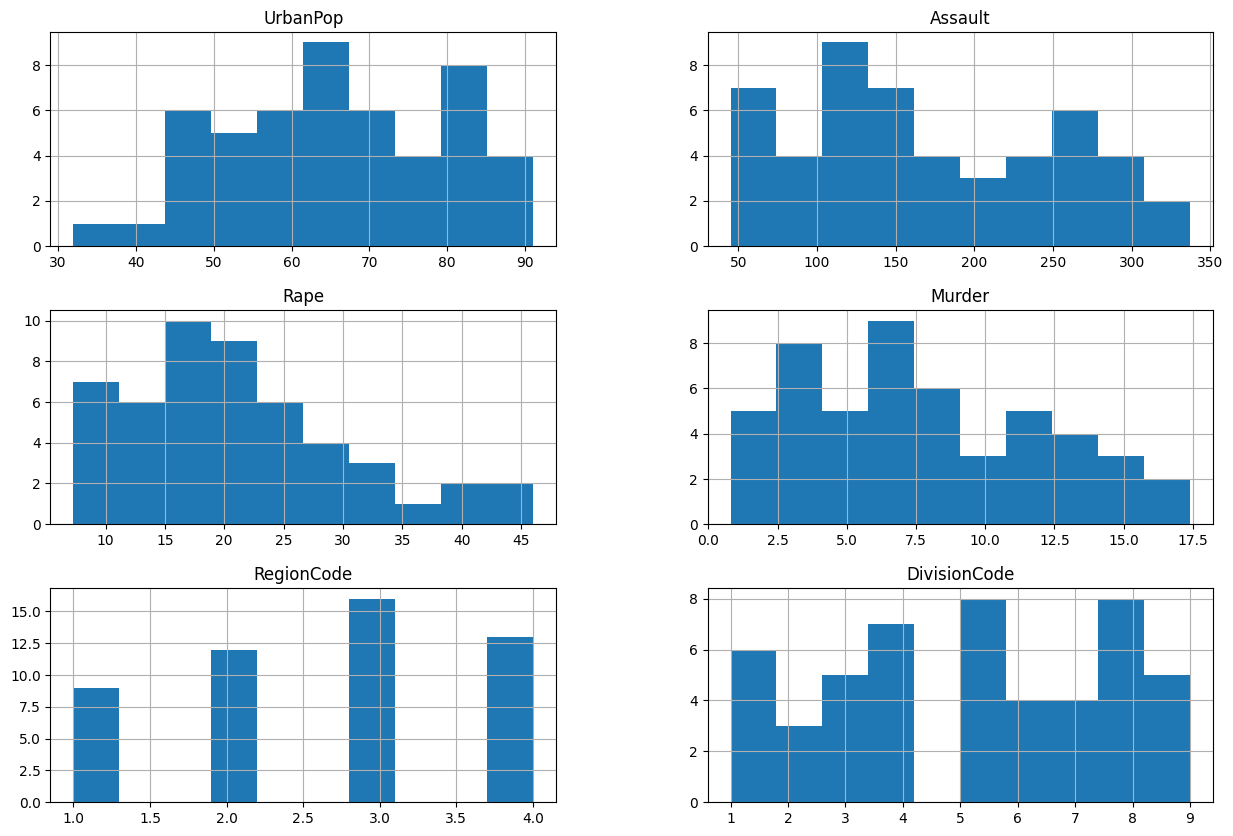

In [11]:
viocrime_num = violent_crime[['UrbanPop', 'Assault', 'Rape', 'Murder', 'RegionCode', 'DivisionCode']]

import matplotlib.pyplot as plt

%matplotlib inline
viocrime_num.hist(bins=10, figsize=(15,10))
plt.show()

From the histograms, we can see that...
- The urban population (UrbanPop) skews a bit to right, and it has two peaks: 65 and 85.
- Assault skews right, and has a peak at around 110.
- Rape skews right, and has a peak at 15. 
- Murder distribution have two peaks at around 2.5 and 6; it skews right. 
- There are four clear peaks for region code - 1, 2, 3, and 4. The values in this column could only be integers, so that explains why there are big gaps between each peak in the graph. The shortest peak is region 1 (Northeast) with about 8 regions, and the tallest peak is region 3 (Midwest) with 16 or 17 states. 
- The distribution for DivisionCode is smoother than region code - but it's a big puzzling that there is a big gap between 4 and 5 when there are multiple states that are in the division 4. Regardless, it appears that there are four peaks - 1, 4, 5, and 8. Divisions 5 (South Atlantic) and 8 (Mountain) are tied for most states (8), and the division 2 (Middle Atlantic) has the least amount of states. 
 

I would say that murder, urban population, rape, and division do NOT group around a given tendency, whereas assault and region do. 

Another way to visualize the distribution of each variable is a boxplot. 

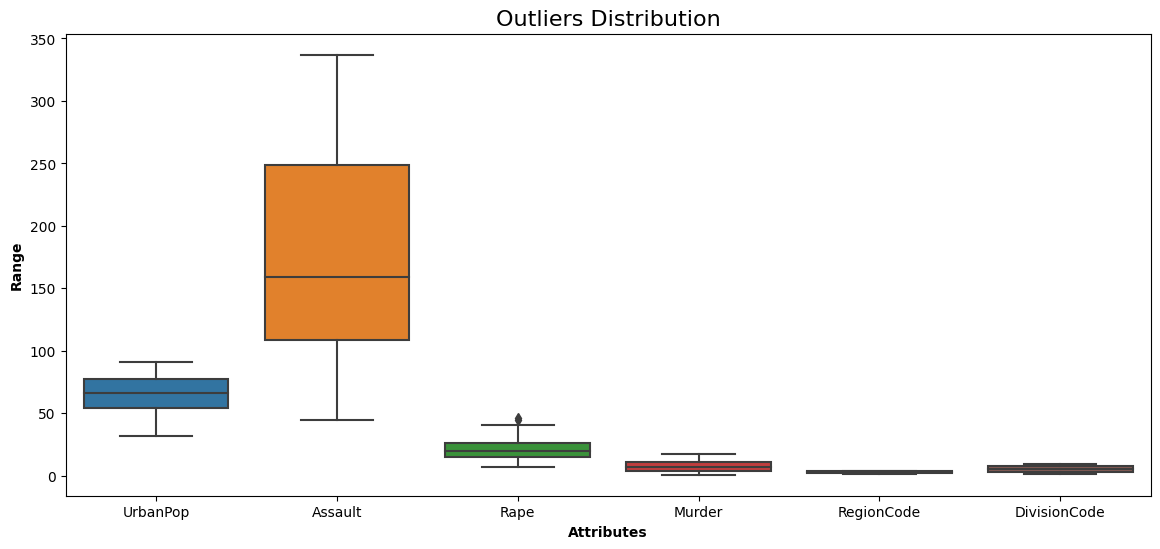

In [12]:
import seaborn as sns

def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient = 'v')
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight= 'bold')
    
show_boxplot(viocrime_num)

Hierarchical cluster is sensitive to outliers, so it may be prudent to remove the outliers from the rape feature. However, there are so few records in the dataset (just 50), I will not be removing the outliers for now.

You can see that each feature has different range of numbers that they reside in - so I will be scaling the numbers later. 

Meanwhile, let's play around with scatter plots of urban population percentage versus individual crime rates. 

In [13]:
import plotly.express as px

fig = px.scatter(violent_crime, x="UrbanPop", y="Assault", hover_name="State", title= "State's Urban Population Percentage vs. Arrests for Assault per 100,000 People in 1973")

fig.show()

In [14]:
fig = px.scatter(violent_crime, x="UrbanPop", y="Rape", hover_name="State", title= "State's Urban Population Percentage vs. Arrests for Rape per 100,000 People in 1973")

fig.show()

In [15]:
fig = px.scatter(violent_crime, x="UrbanPop", y="Murder", hover_name="State", title= "State's Urban Population Percentage vs. Arrests for Murder per 100,000 People in 1973")

fig.show()

For all three scatter plots, I don't see much of a pattern... There might a be positive linear correlation in arrests for rape with increase in urban population percentage, but it's hard to say. 

However, if I scale the numeric columns (which is needed since we're using hierarchical clusers), we might see some patterns change. 

But for now, let's keep exploring. One of the pressing questions is: which had more impact on crime rates? Geographic location? Or Urban Population? 

Let's see if geographic location has any strong linear correlation to the crime rate...

In [16]:
# Region
viocrime_region = pd.DataFrame(violent_crime['Region'].value_counts()).reset_index()
viocrime_region['Percentage'] = viocrime_region['Region'] / violent_crime['Region'].value_counts().sum()
viocrime_region.rename(columns = {'index':'Region', 'Region':'Total'}, inplace = True)
viocrime_region = viocrime_region.sort_values('Total', ascending = True).reset_index(drop = True)

# The dataframe
viocrime_region = violent_crime.groupby('Region').agg({
    'Region': 'count',
    'UrbanPop': 'mean',
    'Assault': 'mean',
    'Rape': 'mean',
    'Murder': 'mean'
    }
).rename(columns = {'Region': 'Total'}).reset_index().sort_values('Total', ascending = True)

viocrime_region

,Region,Total,UrbanPop,Assault,Rape,Murder
1,Northeast,9,70.555556,126.666667,13.777778,4.700000
0,Midwest,12,64.416667,120.333333,18.441667,5.700000
3,West,13,70.615385,187.230769,29.053846,7.030769
2,South,16,59.437500,220.000000,21.162500,11.706250


It appears that Northeast and West has the most urban population percentage (about 70.6% for both), and...
- NE has the 2nd lowest assault rate, lowest rape rate, and lowest murder rate
- West has the 2nd highest assault rate, highest rape rate, and second highest murder rate.

South has the lowest urban population percentage, but it has the highest assault rate, second highest rape rate, and highest murder rate. 

The West has the highest rape rate and second highest assault rate and murder rate. 

Interesting... It's a mixed bag. Let's use bar plots to visualize the table above. 

In [17]:
## Urban Population Percentange of Each Region
fig = px.bar(viocrime_region, y='UrbanPop', x='Region', text_auto='.2s',
            title="Urban Population Percentage of Each Region in 1973")
fig.show()

Yep, Northeast and West regions are tied for the highest urban population division. South regions is the most rural. 

In [18]:
## Arrests for Assault in Each Region
fig = px.bar(viocrime_region, y='Assault', x='Region', text_auto='.2s',
            title="Number of Arrests for Assault per 100,000 Residents in Each Region in 1973")
fig.show()

The South region had the most arrests for assaults, whereas the Midwest region had the least. 

In [19]:
## Arrests for Rape in Each Region
fig = px.bar(viocrime_region, y='Rape', x='Region', text_auto='.2s',
            title="Number of Arrests for Rape per 100,000 Residents in Each Region in 1973")
fig.show()

The West has the highest amount of rapes, whereas the Northeast region has the least amount. 

In [20]:
## Arrests for Murder in Each Region
fig = px.bar(viocrime_region, y='Murder', x='Region', text_auto='.2s',
            title="Number of Arrests for Murder per 100,000 Residents in Each Region in 1973")
fig.show()

The South region has the most murders, whereas the Northeast has the least. 

Now let's break it down even more into divisions. 

In [21]:
# Division
viocrime_div = pd.DataFrame(violent_crime['Division'].value_counts()).reset_index()
viocrime_div['Percentage'] = viocrime_div['Division'] / violent_crime['Region'].value_counts().sum()
viocrime_div.rename(columns = {'index':'Division', 'Division':'Total'}, inplace = True)
viocrime_div = viocrime_div.sort_values('Total', ascending = True).reset_index(drop = True)

# The dataframe
viocrime_div = violent_crime.groupby('Division').agg({
    'Division': 'count',
    'UrbanPop': 'mean',
    'Assault': 'mean',
    'Rape': 'mean',
    'Murder': 'mean'
    }
).rename(columns = {'Division': 'Total'}).reset_index().sort_values('Total', ascending = True)

viocrime_div

,Division,Total,UrbanPop,Assault,Rape,Murder
2,Middle Atlantic,3,82.333333,173.000000,19.933333,8.266667
1,East South Central,4,53.250000,198.000000,20.375000,13.050000
8,West South Central,4,66.000000,197.750000,21.800000,10.875000
0,East North Central,5,72.600000,158.000000,22.460000,7.920000
5,Pacific,5,72.400000,177.800000,32.160000,6.640000
4,New England,6,64.666667,103.500000,10.700000,2.916667
7,West North Central,7,58.571429,93.428571,15.571429,4.114286
3,Mountain,8,69.500000,193.125000,27.112500,7.275000
6,South Atlantic,8,59.250000,242.125000,21.237500,11.450000


Middle Atlantic has the fewest states (just 3) and has the highest percentage of urban population (82.3%). It belongs to the Northeast region, and it no longer had the least arrests for rape or murder. That honor belongs to its other division in Northeast region: New England, with just 64.7% urban population. 

South Atlantic divsion, which belongs to the South region, has the lowest urban population with 59.3%. It has the arrests for assault by far, but is in middle of the pack for arrests for rape. It does have the second highest rate for murder arrests. 

West North Central division, which belongs to the Midwest region, has the lowest rate of assault arrests. 

The Pacific division, which belongs to the West region, has the highest rape arrests. The other West's division, Mountain, has the second highest rape arrests. 

Let's use bar plots again...

In [22]:
## Urban Population Percentange of Each Division
fig = px.bar(viocrime_div, y='UrbanPop', x='Division', text_auto='.2s',
            title="Urban Population Percentage of Each Region")
fig.show()

The Middle Atlantic division, which is part of the Northeast Region, has the highest percentage of urban population. East South Central division, which is part of the South region, is the most rural state. 

In [23]:
## Assault Arrests in Each Division
fig = px.bar(viocrime_div, y='Assault', x='Division', text_auto='.2s',
            title="Number of Arrests for Assault per 100,000 Residents in Each Division")
fig.show()

The South Atlantic division, which is part of the South region, has the most arrests for assault. The West North Central, which is part of the Midwest region, has the least amount of arrests. 

In [24]:
## Rape Arrests in Each Division
fig = px.bar(viocrime_div, y='Rape', x='Division', text_auto='.2s',
            title="Number of Arrests for Rape per 100,000 Residents in Each Division")
fig.show()

The Pacific division, which is part of the West region, has the most arrests for rape. New England, which is part of the Northeast Region, has the least amount of arrests.

In [25]:
## Murder Arrests in Each Division
fig = px.bar(viocrime_div, y='Murder', x='Division', text_auto='.2s',
            title="Number of Murders per 100,000 Residents in Each Division")
fig.show()

East South Central, which is part of the South Region, has the most arrests for murder. New England, which is part of the Northeast Region, has the least arrests. 

### Data Analysis - Multiple Regression

Before performing hierarchical clustering, I will be doing multiple regression to see which one has a stronger influence on crime rates: Geographic location (region or division) or urban population. 

I will be normalizing the numeric columns plus RegionCode and DivisionCode. I opted to normalize the data instead of standardizing because normalization is often applied when the data is skewed on on either axis, which is very evident in a few features when we visualized the data earlier. 

You will not see this in the code, but I tried to one-hot encode Division and Region columns. While I was able to get a multiple regression (OLS) with these encoded columns, there were warnings that there are
strong multicollinearity problems or that the design matrix is singular. When I used scaled division and region codes instead, I had no warnings with the multiple regression models. 

In [26]:
## Normalize the numeric columns + RegionCode + DivisionCode
from sklearn.preprocessing import normalize

viocrime_numeric = violent_crime[['RegionCode', 'DivisionCode', 'UrbanPop', 'Assault', 'Rape', 'Murder']]

data_scaled = normalize(viocrime_numeric)
data_scaled = pd.DataFrame(data_scaled, columns=viocrime_numeric.columns)
data_scaled.head()

,RegionCode,DivisionCode,UrbanPop,Assault,Rape,Murder
0,0.012275,0.024550,0.237321,0.965652,0.086745,0.054011
1,0.014739,0.033163,0.176870,0.969100,0.163973,0.036848
2,0.013051,0.026101,0.261011,0.959215,0.101142,0.026427
3,0.015169,0.035393,0.252810,0.960679,0.098596,0.044495
4,0.013617,0.030639,0.309797,0.939606,0.138217,0.030639


In [27]:
## Drop unscaled data
viocrime_better = violent_crime.drop(['UrbanPop', 'Assault', 'Rape', 'Murder', 'RegionCode', 'DivisionCode'], axis=1)

# Merge scaled data dataframe with encoded dataframe
viocrime_scaled = pd.concat([viocrime_better, data_scaled], axis=1)
viocrime_scaled.head()

,State,Region,Division,RegionCode,DivisionCode,UrbanPop,Assault,Rape,Murder
0,Alabama,South,East South Central,0.012275,0.024550,0.237321,0.965652,0.086745,0.054011
1,Alaska,West,Pacific,0.014739,0.033163,0.176870,0.969100,0.163973,0.036848
2,Arizona,West,Mountain,0.013051,0.026101,0.261011,0.959215,0.101142,0.026427
3,Arkansas,South,West South Central,0.015169,0.035393,0.252810,0.960679,0.098596,0.044495
4,California,West,Pacific,0.013617,0.030639,0.309797,0.939606,0.138217,0.030639


Let's take a quick pause to describe the new dataset to see if anything significant has changed.

In [28]:
viocrime_scaled[['UrbanPop', 'Assault', 'Rape', 'Murder']].describe()

,UrbanPop,Assault,Rape,Murder
count,50.000000,50.000000,50.000000,50.000000
mean,0.409233,0.881052,0.119230,0.040645
std,0.166547,0.101877,0.035551,0.015003
min,0.132093,0.471006,0.042619,0.012594
25%,0.279195,0.850307,0.092731,0.027453
50%,0.394497,0.905576,0.117396,0.039378
75%,0.508660,0.951762,0.139372,0.049756
max,0.849858,0.989226,0.206833,0.079227


We can see that:
- Mean
    - UrbanPop: 0.410 
    - Assault: 0.882 (highest crime rate mean)
    - Rape: 0.120
    - Murder: 0.041 (lowest crime rate mean)
- Standard Deviation
    - UrbanPop: 0.167 (largest deviation)
    - Assault: 0.102
    - Rape: 0.036
    - Murder: 0.015 
- Min
    - UrbanPop: 0.132
    - Assault: 0.473 (highest)
    - Rape: 0.043 
    - Murder: 0.013 (lowest)
- 50% 
    - UrbanPop: 0.395 
    - Assault: 0.907 (highest)
    - Rape: 0.0426
    - Murder: 0.039 (lowest)
- Max
    - UrbanPop: 0.854   
    - Assault: 0.990 (highest)
    - Rape: 0.208 
    - Murder: 0.079 (lowest)

    
In term of crime rates, murder is consistently the lowest value and assault consistently have the highest value. From just looking at the numbers, I would guess that the murder column would skew right, and that the assault column would skew left heavily. Let's do distribution plots again...

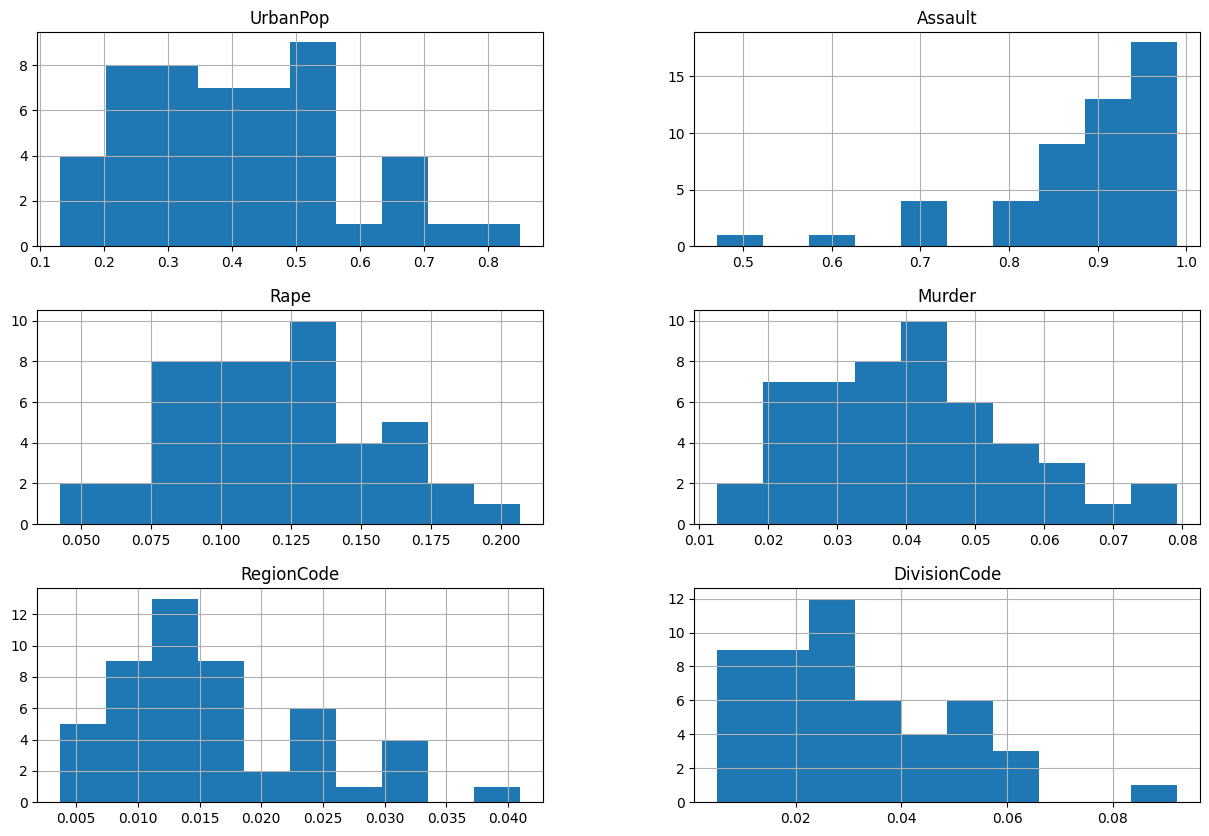

In [29]:
viocrime_scanum = viocrime_scaled[['UrbanPop', 'Assault', 'Rape', 'Murder', 'RegionCode', 'DivisionCode']]

%matplotlib inline
viocrime_scanum.hist(bins=10, figsize=(15,10))
plt.show()

Looks like there are some changes in distribution from unscaled data. Let's do outlier distributions again...

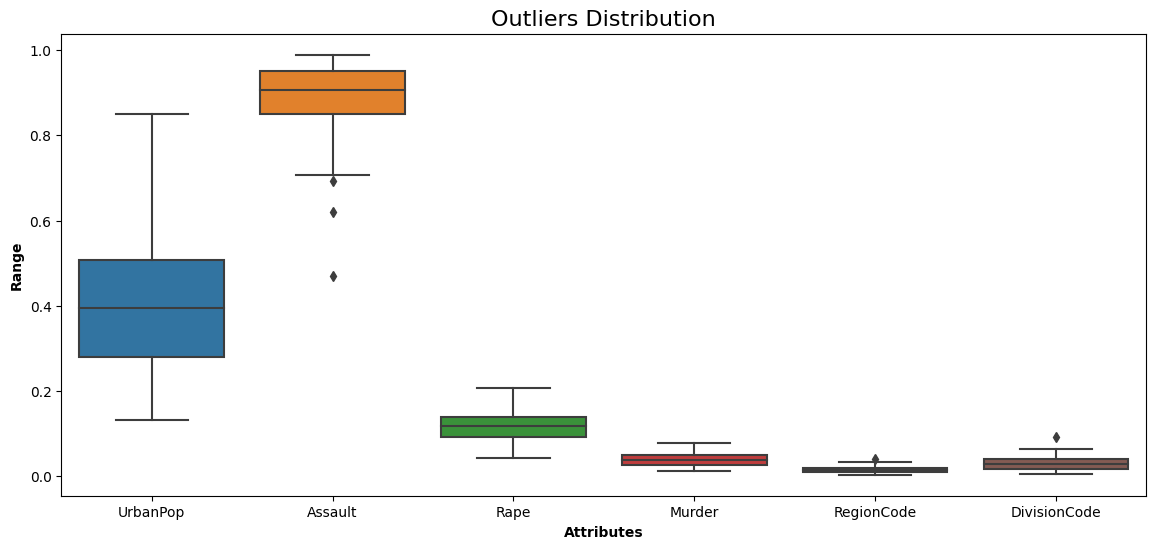

In [30]:
show_boxplot(viocrime_scanum)

Looks like we have more outliers in assault, region code, and division code. We did manage to remove the outliers from the rape feature by scaling the features. Since there are so few of records in the dataset, I will be leaving them in. 

Let's play around with scatterplots again. 

In [31]:
# UrbanPop vs. Assault
fig = px.scatter(viocrime_scaled, x="UrbanPop", y="Assault", hover_name="State", title= "UrbanPop vs. Arrests for Assault in 1973 - Scaled")
fig.show()

Now there is a strong correlation between urban population and assault! We can see that there is a strong negative correlation between the percentage of urban population to arrests for assault. The more rural the state is, the higher the number of arrests for assault would be. 

In [32]:
# UrbanPop vs. Rape
fig = px.scatter(viocrime_scaled, x="UrbanPop", y="Rape", hover_name="State", title= "UrbanPop vs. Arrests for Rape in 1973 - Scaled")
fig.show()

I don't see much of a pattern between the percentage of urban population to rape rate, except for maybe a slight positive correlation due to Hawaii in the far upper right corner. 

In [33]:
# UrbanPop vs. Murder
fig = px.scatter(viocrime_scaled, x="UrbanPop", y="Murder", hover_name="State", title= "UrbanPop vs. Arrests for Murder in 1973 - Scaled")
fig.show()

Like the scatterplot for UrbanPop vs. Rape, I don't see much of a pattern for the percentage of urban population vs. murder... except there could be a slight negative correlation if it wasn't for Hawaii on the right side of the graph. 

Okay, let's run some multiple regression models (OLS)! 

In [34]:
import statsmodels.api as sm

## Multiple regression on assault - using just regions 
# Define the independent and dependent variables
X = viocrime_scaled.drop(['Assault', 'State', 'Region', 'Division', 'DivisionCode'], axis=1)
y = viocrime_scaled['Assault']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     117.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.15e-23
Time:                        17:20:45   Log-Likelihood:                 104.74
No. Observations:                  50   AIC:                            -199.5
Df Residuals:                      45   BIC:                            -189.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1443      0.022     52.500      0.0

In this multiple regression model, it looks like the region has a sronger pull than the urban population. The R-squared is very good - 0.913. 

Let's check out the OLS on rape rate for regions.

In [35]:
## Multiple regression on rape - using just regions 

# Define the independent and dependent variables
X = viocrime_scaled.drop(['Rape', 'State', 'Region', 'Division', 'DivisionCode'], axis=1)
y = viocrime_scaled['Rape']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rape   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     5.517
Date:                Thu, 27 Apr 2023   Prob (F-statistic):            0.00106
Time:                        17:20:45   Log-Likelihood:                 106.37
No. Observations:                  50   AIC:                            -202.7
Df Residuals:                      45   BIC:                            -193.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0913      0.166      0.551      0.5

The R-squared is much weaker this time around (just 0.329 as opposed to 0.9+ for assault), but it appears that the regions still have a stronger pull than urban population. 

Let's check out the OLS on murder for regions. 

In [36]:
## Multiple regression on murder - using just regions 

# Define the independent and dependent variables
X = viocrime_scaled.drop(['Murder', 'State', 'Region', 'Division', 'DivisionCode'], axis=1)
y = viocrime_scaled['Murder']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Murder   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     2.446
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0600
Time:                        17:20:45   Log-Likelihood:                 144.45
No. Observations:                  50   AIC:                            -278.9
Df Residuals:                      45   BIC:                            -269.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1101      0.076      1.450      0.1

The R-squared is even weaker (0.179!), and yet the regions still have a stronger pull than the urban population. 

I'll rerun the models with divisions instead of regions. 

In [37]:
## Multiple regression on assault - using just divisions 
# Define the independent and dependent variables
X = viocrime_scaled.drop(['Assault', 'State', 'Region', 'Division', 'RegionCode'], axis=1)
y = viocrime_scaled['Assault']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Assault   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     121.0
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.81e-23
Time:                        17:20:45   Log-Likelihood:                 105.36
No. Observations:                  50   AIC:                            -200.7
Df Residuals:                      45   BIC:                            -191.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.1428      0.022     52.975   

In [38]:
## Multiple regression on rape - using just divisions 
# Define the independent and dependent variables
X = viocrime_scaled.drop(['Rape', 'State', 'Region', 'Division', 'RegionCode'], axis=1)
y = viocrime_scaled['Rape']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Rape   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     6.102
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           0.000519
Time:                        17:20:45   Log-Likelihood:                 107.23
No. Observations:                  50   AIC:                            -204.5
Df Residuals:                      45   BIC:                            -194.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0577      0.165      0.349   

In [39]:
## Multiple regression on assault - using just divisions 
# Define the independent and dependent variables
X = viocrime_scaled.drop(['Murder', 'State', 'Region', 'Division', 'RegionCode'], axis=1)
y = viocrime_scaled['Murder']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

#Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Murder   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.407
Date:                Thu, 27 Apr 2023   Prob (F-statistic):             0.0633
Time:                        17:20:45   Log-Likelihood:                 144.38
No. Observations:                  50   AIC:                            -278.8
Df Residuals:                      45   BIC:                            -269.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1139      0.077      1.483   

Whereas the divisions have a higher absolute value coefficient (and thus a stronger pull on the respective crime rate) on rape, the coefficients were actually very similar for the assault OLS, and the murder OLS is showing that the urban population actually have more impact on the murder rate than the divisions. 

So it appears that the geographic location vs. urban population percentage question is answered differently based on the _scale_ of the geographic location. 

So in conclusion for the multiple regression portion:
- When analyzed at the regional level, geographic location have a stronger influence than urban population percentage on all crime rates.
- When analyzed at the divisional level - which is smaller than regional level - the geographic location has a stronger influence on rape arrest rate in states, the geographic location and urban population percentage has same amount of influence on the assault arrest rate, and urban population percentage has a higher impact on the murder arrest rate than the geographic location. 

### Data Analysis and Visualization - Hierarchical Clustering 

Now it is time to do hierarchical clustering! I will be comparing hierarchical clustering with no geographic location, with just regions, with just divisions, and with both regions and divisions. Let's dive in. 

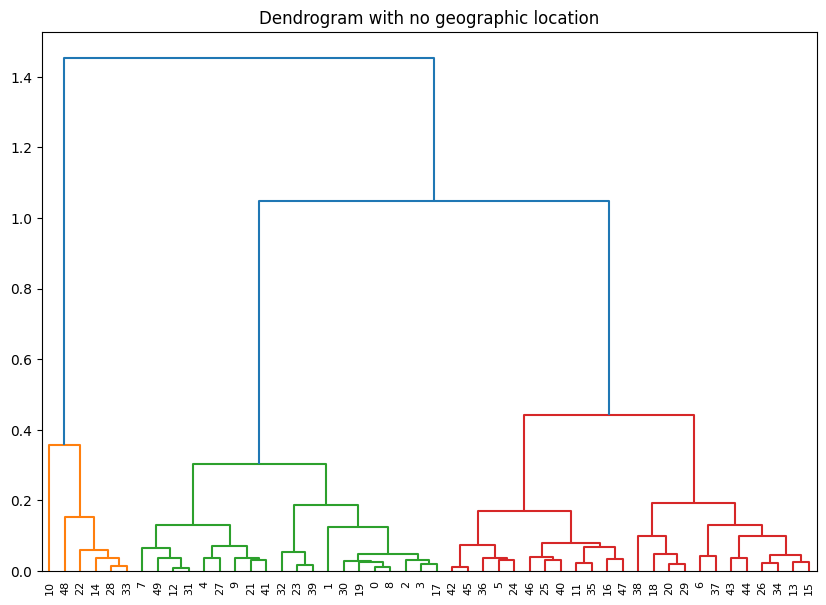

In [40]:
import scipy.cluster.hierarchy as shc

## no geolocation
viocrime_nogeo = viocrime_scaled.drop(['State', 'Region', 'Division', 'RegionCode', 'DivisionCode'], axis=1)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with no geographic location")
dend = shc.dendrogram(shc.linkage(viocrime_nogeo, method='ward'))

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line. Let's use the threshold of 0.8 and cut the dendrogram. I am using the ward method, which uses the error sum of squares to minimizes the total within-cluster variance. 

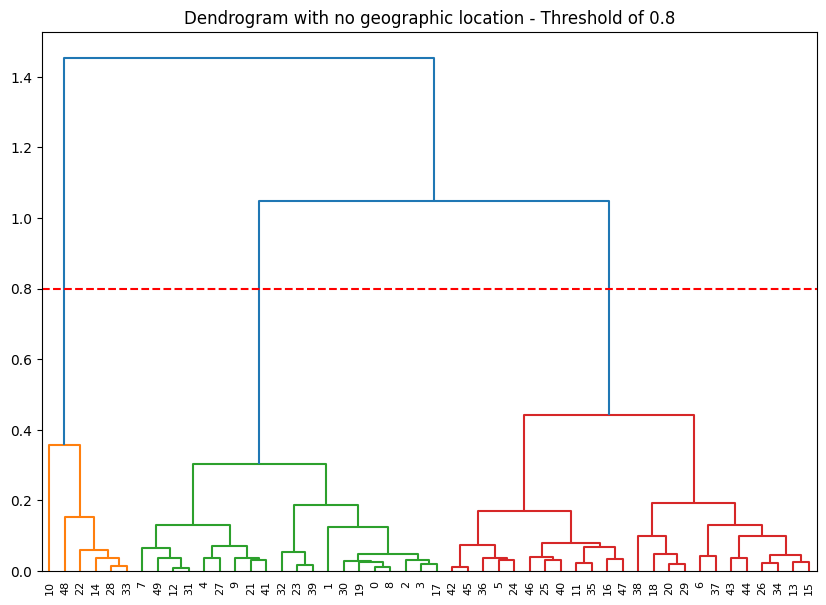

In [41]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram with no geographic location - Threshold of 0.8")
dend = shc.dendrogram(shc.linkage(viocrime_nogeo, method='ward'))
plt.axhline(y=0.8, color='r', linestyle='--')

We have three clusters as this line cuts the dendrogram at three points. Let's now apply hierarchial clustering for 3 clusters. I am using agglomerative clustering, which divide the data points into different clusters and then aggregate them as the distance increases. 

Another type of clustering is divisive, which combine all the data points as a single cluster and divide them as the distance between them increases. Since divisive clustering is more complex as compared to agglomerative clustering, it is as not widely-used in practice. 

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
cluster.fit_predict(viocrime_nogeo)


array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2])

0 represents the points that belong to the first cluster, 1 represents points in the second cluster, and 2 represents points in the third cluster. Let's visualize the three clusters.

In [43]:
## this will help us later in calcuating the V-measure (to be explained later)
no_geoloc_pred = cluster.fit_predict(viocrime_nogeo)

Text(0, 0.5, 'Assault Rate')

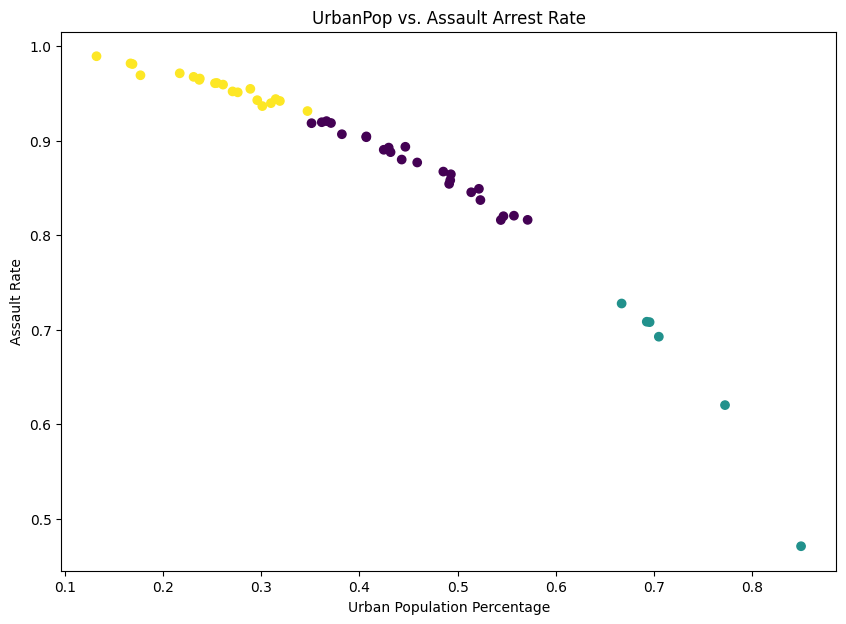

In [44]:
plt.figure(figsize=(10, 7))  
plt.scatter(viocrime_scaled['UrbanPop'], viocrime_scaled['Assault'], c=cluster.labels_) 
plt.title("UrbanPop vs. Assault Arrest Rate")
plt.xlabel("Urban Population Percentage")
plt.ylabel("Assault Rate")

Text(0, 0.5, 'Rape Rate')

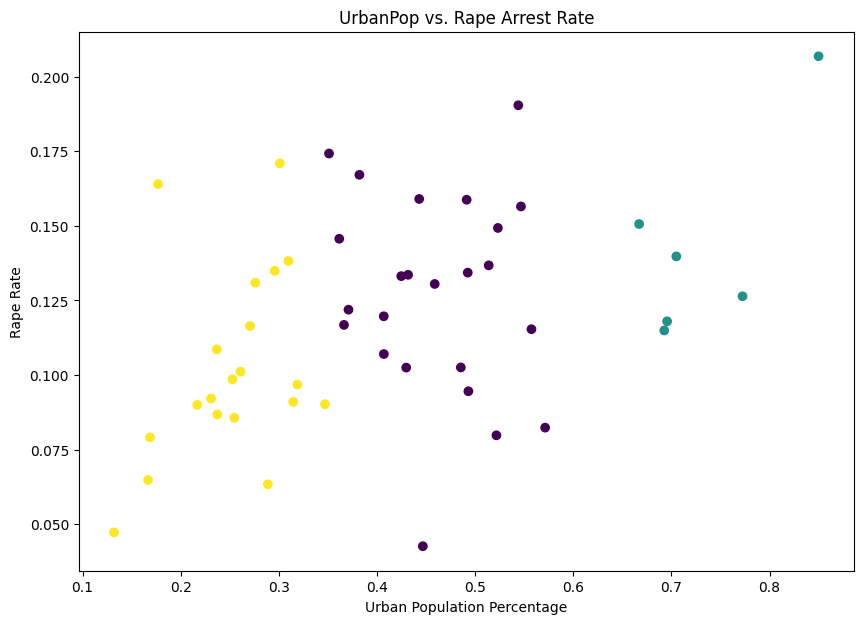

In [45]:
plt.figure(figsize=(10, 7))  
plt.scatter(viocrime_scaled['UrbanPop'], viocrime_scaled['Rape'], c=cluster.labels_) 
plt.title("UrbanPop vs. Rape Arrest Rate")
plt.xlabel("Urban Population Percentage")
plt.ylabel("Rape Rate")

Text(0, 0.5, 'Murder Rate')

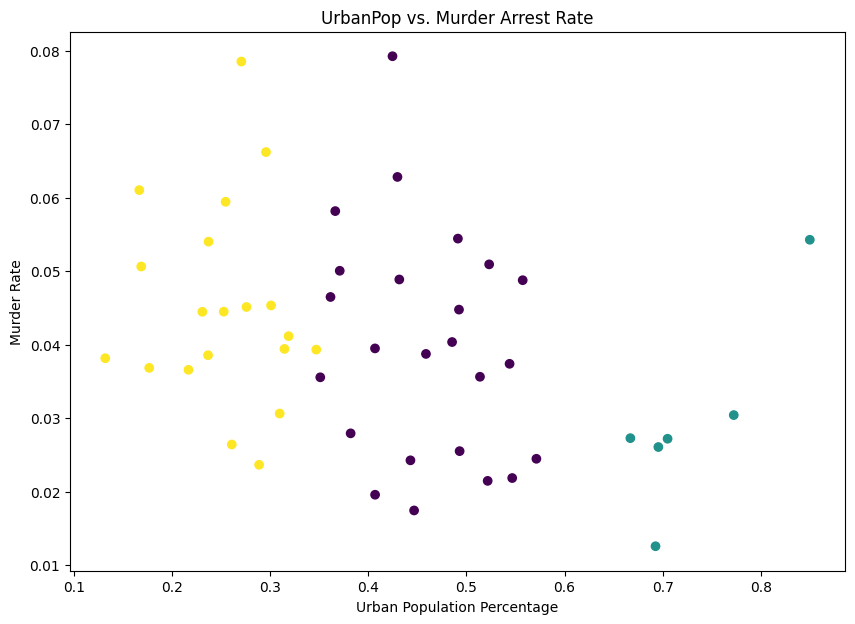

In [46]:
plt.figure(figsize=(10, 7))  
plt.scatter(viocrime_scaled['UrbanPop'], viocrime_scaled['Murder'], c=cluster.labels_) 
plt.title("UrbanPop vs. Murder Arrest Rate")
plt.xlabel("Urban Population Percentage")
plt.ylabel("Murder Rate")

There are three clear clusters in each graph, which is super exciting to see, and indicate that there are three latent groups.

However, I'm still super curious about the geographic location, so let's try to do hierarchical clustering with just divisions, just regions, and both regions and divisions. 

Now let's create a series of dendrograms to figure out their clusters. Eventually, I will use v-measure to compare the results to the clusters with NO geographic location. V-measure is the harmonic mean between homogeneity and completeness. The metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won't change the score value in any way. 

The metric is symmetric: switching true label (e.g. y_true) with pred label (e.g. y_pred) will return the same score value. This is super helpful for us here since the real ground truth is not known. 

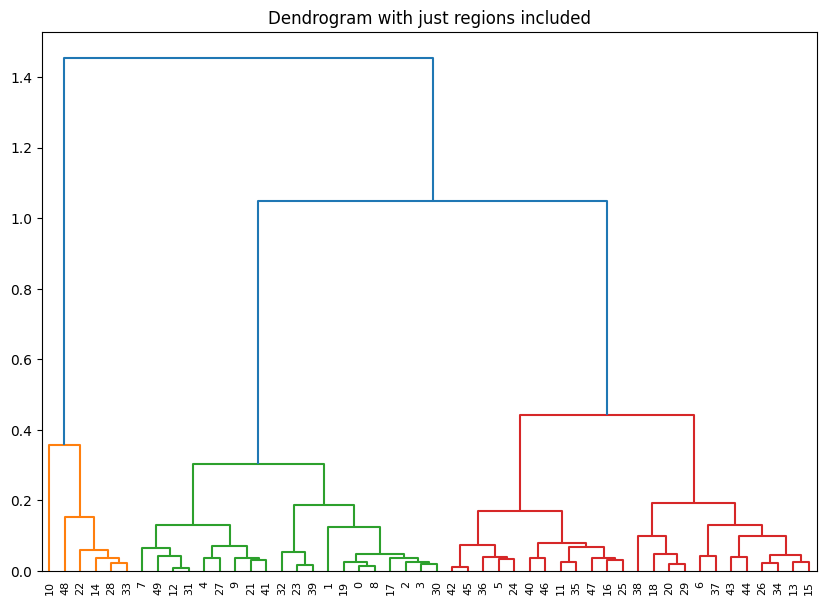

In [47]:
## Just Regions
reg_scaled = viocrime_scaled.drop(['State', 'Region', 'Division', 'DivisionCode'], axis=1)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with just regions included")
dend = shc.dendrogram(shc.linkage(reg_scaled, method='ward'))

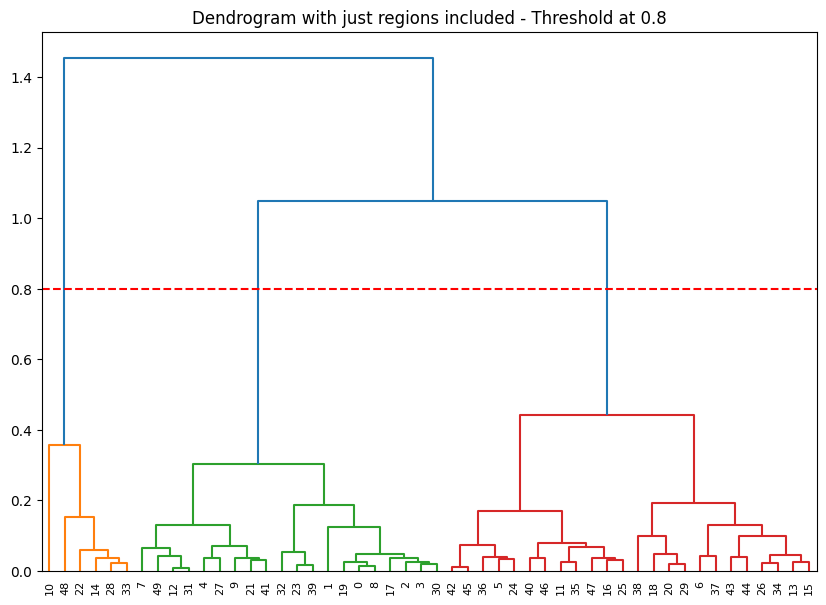

In [48]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram with just regions included - Threshold at 0.8")
dend = shc.dendrogram(shc.linkage(reg_scaled, method='ward'))
plt.axhline(y=0.8, color='r', linestyle='--')

In [49]:
reg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
reg_pred = reg_cluster.fit_predict(reg_scaled)

#Calculating the V-measure score between no geo location clusters and region clusters
from sklearn.metrics import v_measure_score
v_measure_score(reg_pred, no_geoloc_pred)

1.0

The score of V-measure is 1, which means both arrays from the no geo location clusters and the region clusters are exactly the same. In other words, it is both homogeneous and complete. 

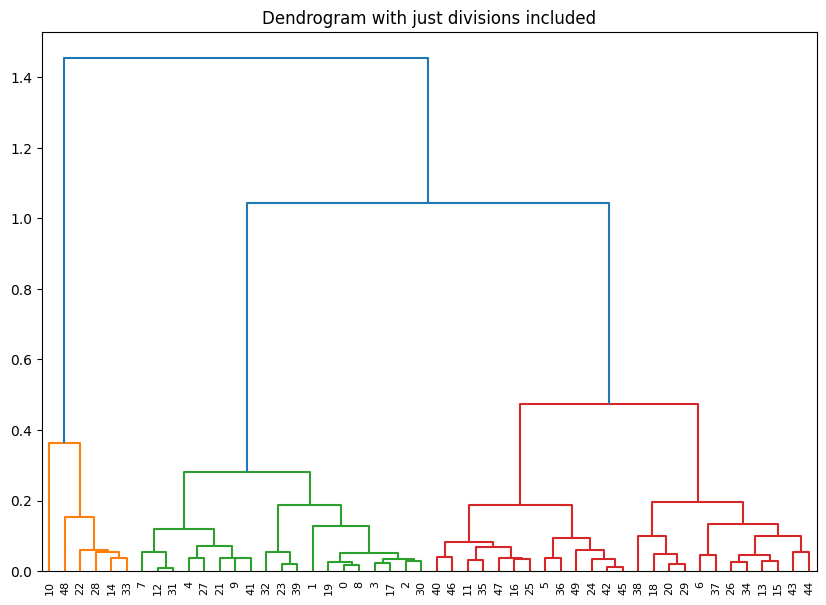

In [50]:
## Just divisions
div_scaled = viocrime_scaled.drop(['State', 'Region', 'Division', 'RegionCode'], axis=1)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with just divisions included")
dend = shc.dendrogram(shc.linkage(div_scaled, method='ward'))

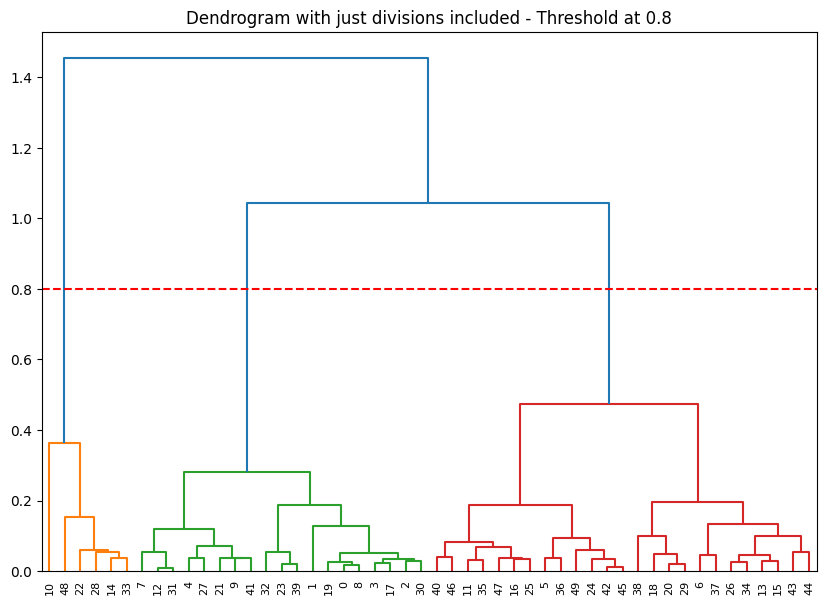

In [51]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram with just divisions included - Threshold at 0.8")
dend = shc.dendrogram(shc.linkage(div_scaled, method='ward'))
plt.axhline(y=0.8, color='r', linestyle='--')

In [52]:
div_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
div_pred = div_cluster.fit_predict(div_scaled)

#Calculating the V-measure score between no geo location clusters and division clusters
v_measure_score(div_pred, no_geoloc_pred)

0.9158685907655619

There is a difference this time - probably due to Wyoming changing clusters - between the two arrays and thus the V-measure score has been lowered to 0.916. Still pretty similar, though. 

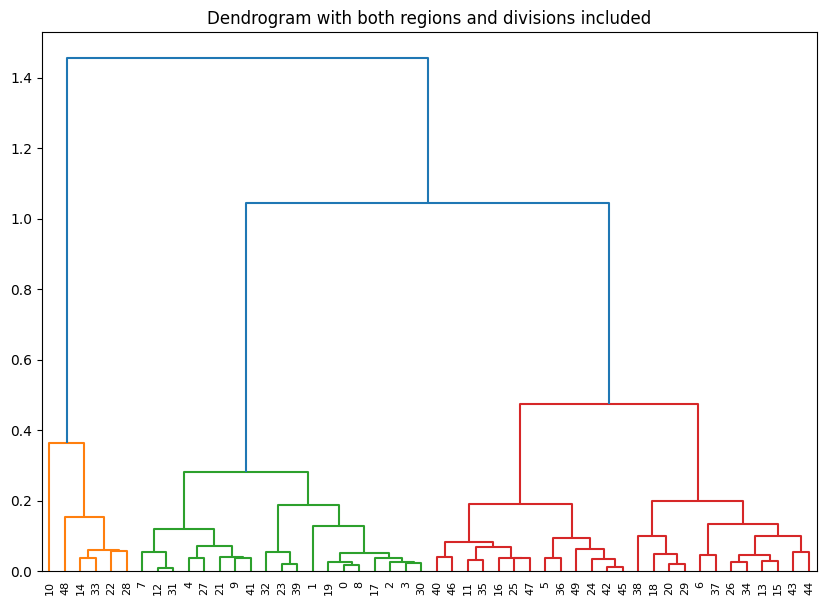

In [53]:
## Both regions and divisions
all_scaled = viocrime_scaled.drop(['State', 'Region', 'Division'], axis=1)

plt.figure(figsize=(10, 7))
plt.title("Dendrogram with both regions and divisions included")
dend = shc.dendrogram(shc.linkage(all_scaled, method='ward'))

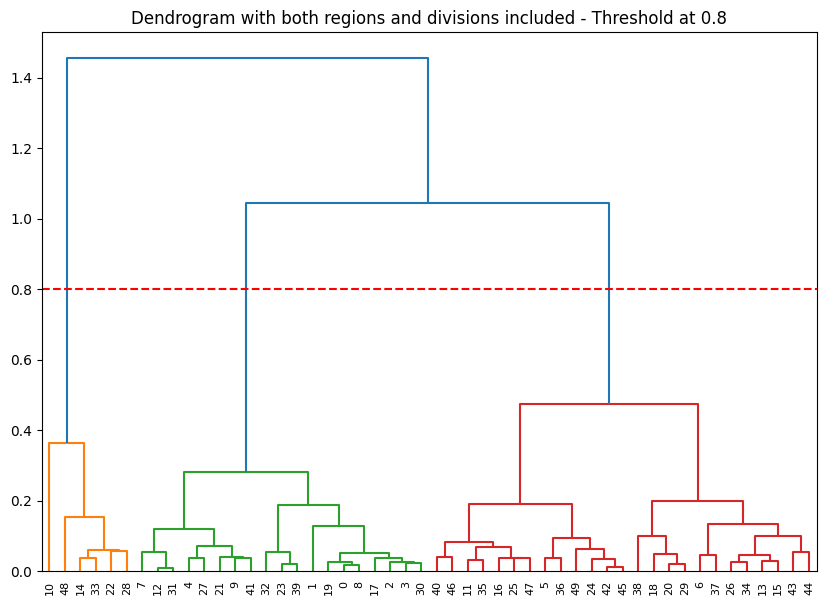

In [54]:
plt.figure(figsize=(10,7))
plt.title("Dendrogram with both regions and divisions included - Threshold at 0.8")
dend = shc.dendrogram(shc.linkage(all_scaled, method='ward'))
plt.axhline(y=0.8, color='r', linestyle='--')

In [55]:
all_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
all_pred = div_cluster.fit_predict(all_scaled)

#Calculating the V-measure score between no geo location clusters and division clusters
v_measure_score(all_pred, no_geoloc_pred)

0.9158685907655619

The V-measure score is exactly the same as the one for between the no geo location clusters and the division clusters. 

Conclusion for hierarchical clustering
- There is very little difference between the dendrograms with geographic locations included and the dendrogram with no geographic location, as indicated by the V-measure score. This could indicates that the geographic location has no strong impact on the crime rates of the states.
- There are three clear latent groups. Wyoming switches clusters if the geographic location is included. 
